<a href="https://colab.research.google.com/github/Suvarnaph/hello-world/blob/master/ImageLoader_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive
drive.mount('/content/drive/')

#project_path = "/content/drive/My Drive/AIML/Capstone_Team/MURA-v1.1/"
project_path = "/content/drive/My Drive/AIML/Capstone/MURA-v1.1/"

from __future__ import absolute_import, division, print_function
from pathlib import Path
import re
import os
from os import getcwd
from os.path import exists, isdir, isfile, join
import shutil
import numpy as np
import pandas as pd
import glob
import cv2

%matplotlib inline
from matplotlib import pyplot as plt

root = Path(project_path)
#print(root)
#for folders in root.iterdir():
  #print(folders)

train_dir = root/'train/' #create train path
#print(train_dir)

test_dir = root/'valid/' #create valid(test) path
#print(test_dir)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
def label_img(img):
    word_label = os.path.basename(os.path.dirname(img))
    print(word_label)
    if word_label == 'study1_positive': return 1
    elif word_label == 'study1_negative': return 0

In [0]:
#Image_processing method
def image_read_resize(file):
  #Reading image file in greyscale
  #formatRead = cv2.IMREAD_GRAYSCALE
  formatRead = cv2.IMREAD_UNCHANGED
  OrigImage = cv2.imread(file,formatRead)
  print(type(OrigImage))
  print('Before Resize - The shape of img is: {}'.format(OrigImage.shape))
  
  #resizing image
  width = 224
  height = 224
  dim = (width, height)
  #resizedImg = cv2.resize(OrigImage, dim, interpolation = cv2.INTER_AREA)
  resizedImg = cv2.resize(OrigImage, dim)
  print('Resized Dimensions : ',resizedImg.shape)
  plt.imshow(resizedImg)
  plt.show()
  return resizedImg

/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND
2
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive
[PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image1.png'), PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image2.png'), PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image3.png')]
3
study1_positive
1
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image1.png
<class 'numpy.ndarray'>
Before Resize - The shape of img is: (512, 406, 3)
Resized Dimensions :  (224, 224, 3)


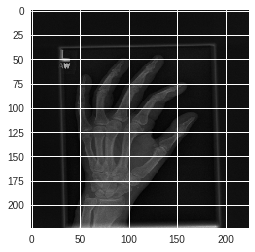

study1_positive
1
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image2.png
<class 'numpy.ndarray'>
Before Resize - The shape of img is: (512, 406, 3)
Resized Dimensions :  (224, 224, 3)


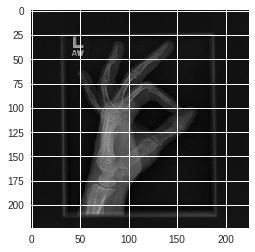

study1_positive
1
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00008/study1_positive/image3.png
<class 'numpy.ndarray'>
Before Resize - The shape of img is: (512, 406, 3)
Resized Dimensions :  (224, 224, 3)


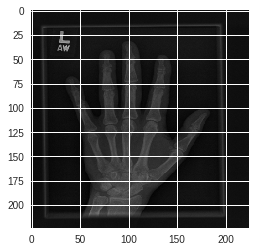

/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative
[PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative/image3.png'), PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative/image2.png'), PosixPath('/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative/image1.png')]
3
study1_negative
0
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative/image3.png
<class 'numpy.ndarray'>
Before Resize - The shape of img is: (512, 512)
Resized Dimensions :  (224, 224)


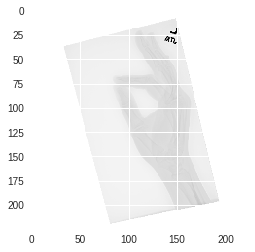

study1_negative
0
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative/image2.png
<class 'numpy.ndarray'>
Before Resize - The shape of img is: (512, 397)
Resized Dimensions :  (224, 224)


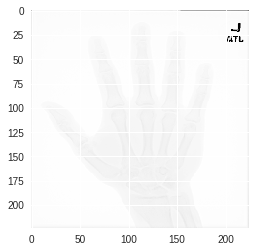

study1_negative
0
/content/drive/My Drive/AIML/Capstone/MURA-v1.1/train/XR_HAND/patient00050/study1_negative/image1.png
<class 'numpy.ndarray'>
Before Resize - The shape of img is: (512, 512)
Resized Dimensions :  (224, 224)


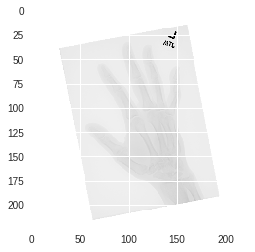

In [79]:
#Loop through folders and print the images after resize
x_train = []
y_train = []

for study_category in train_dir.iterdir():
  print(study_category)
  patient_list = sum(1 for _ in study_category.iterdir()) # converting number of patients to list
  print(patient_list)
  for patient_id in study_category.iterdir():
    print(patient_id)
    for study_type in patient_id.iterdir():
      print(study_type)
      filelist = list(study_type.glob('**/*.png'))
      print(filelist)
      print(len(filelist))
      for fname in filelist:
        class_label= label_img(fname)
        print(class_label)
        for file in glob.glob(str(fname)):
          print(file)
          resizedImg = image_read_resize(file)
          x_train.append(resizedImg)
          y_train.append(class_label)